Purpose of this file:

Implement different feature extractions methods using librosa and numpy

In [1]:
import math
import librosa

import numpy as np
import librosa.display as ld
import matplotlib.pyplot as plt

In [2]:
# loading the songs
sg1, sr = librosa.load(librosa.example("nutcracker"))
sg2, _ = librosa.load(librosa.example("choice"))
sg3, _ = librosa.load(librosa.example("robin"))

In [3]:
# Amplitude Envelope
def AE(signal, frame_length):
    AE = []

    # Calculate the number of frames
    num_frames = math.floor(len(signal) / frame_length)
    
    for t in range(num_frames):
        # Calculate the lower and upper bound
        lower = t * frame_length
        upper = min((t+1) * frame_length, len(signal))
        
        # Find the maximum of each frame and add it to our array
        frame_max = np.max(np.abs(signal[lower:upper]))
        AE.append(frame_max)
    
    return np.array(AE)

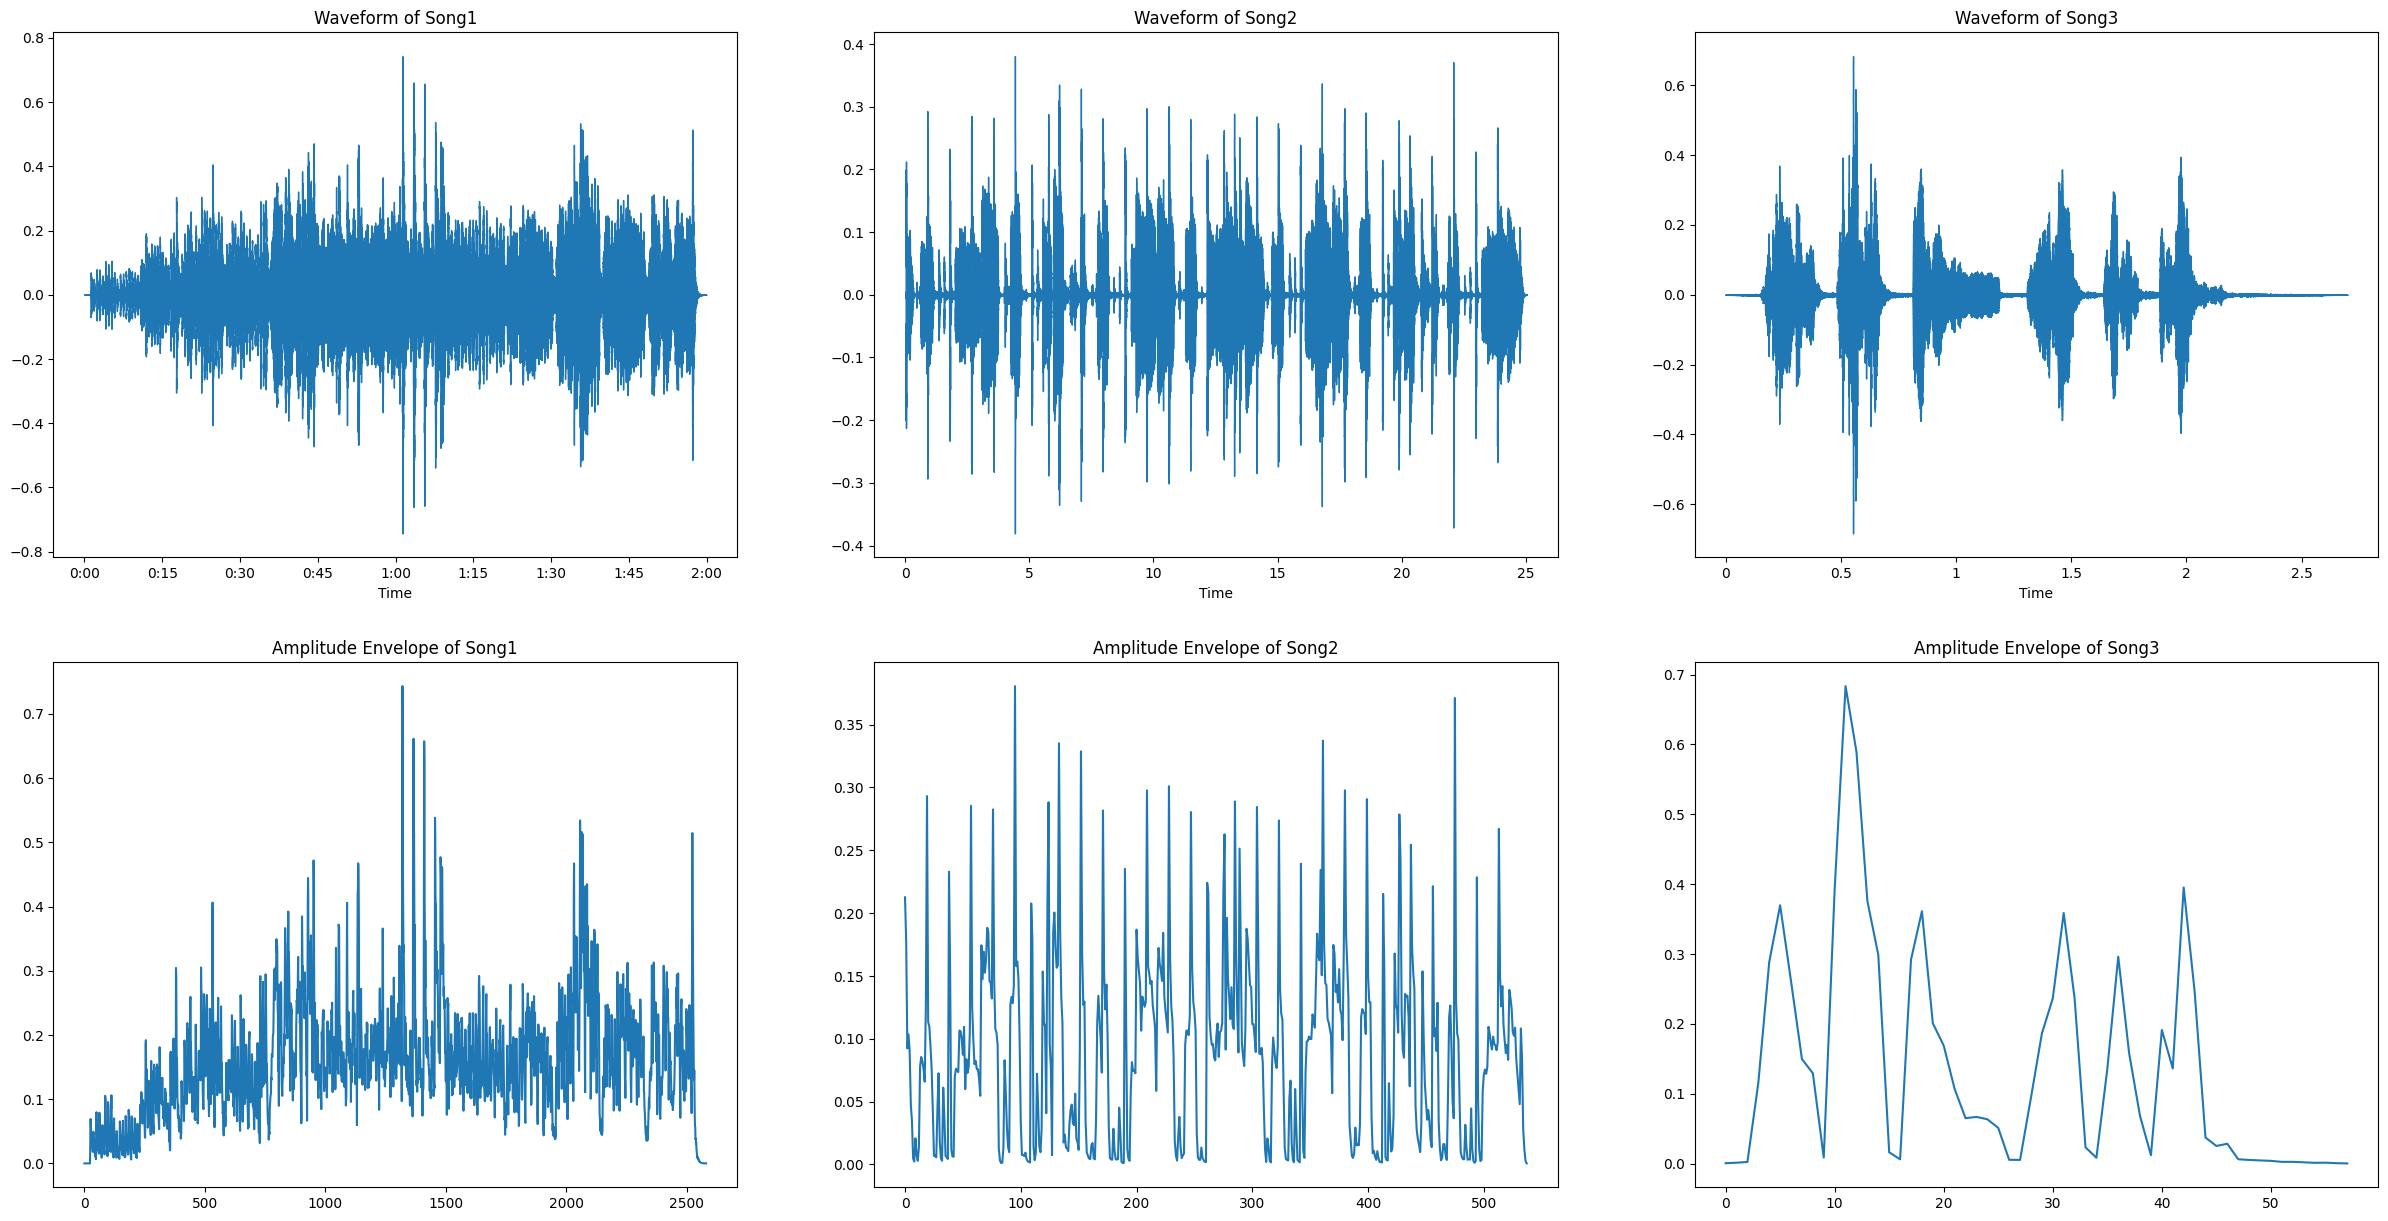

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(30,15))
# plotting song1
ax[0,0].set(title="Waveform of Song1")
ld.waveshow(sg1, sr=sr, ax=ax[0,0])
ax[1,0].set(title = 'Amplitude Envelope of Song1')
ax[1,0].plot(AE(sg1, 1024))

# plotting song2
ax[0,1].set(title="Waveform of Song2")
ld.waveshow(sg2, sr=sr, ax=ax[0,1])
ax[1,1].set(title="Amplitude Envelope of Song2")
ax[1,1].plot(AE(sg2, 1024))

# plotting song3
ax[0,2].set(title="Waveform of Song3")
ld.waveshow(sg3, sr=sr, ax=ax[0,2])
ax[1,2].set(title="Amplitude Envelope of Song3")
ax[1,2].plot(AE(sg3, 1024))

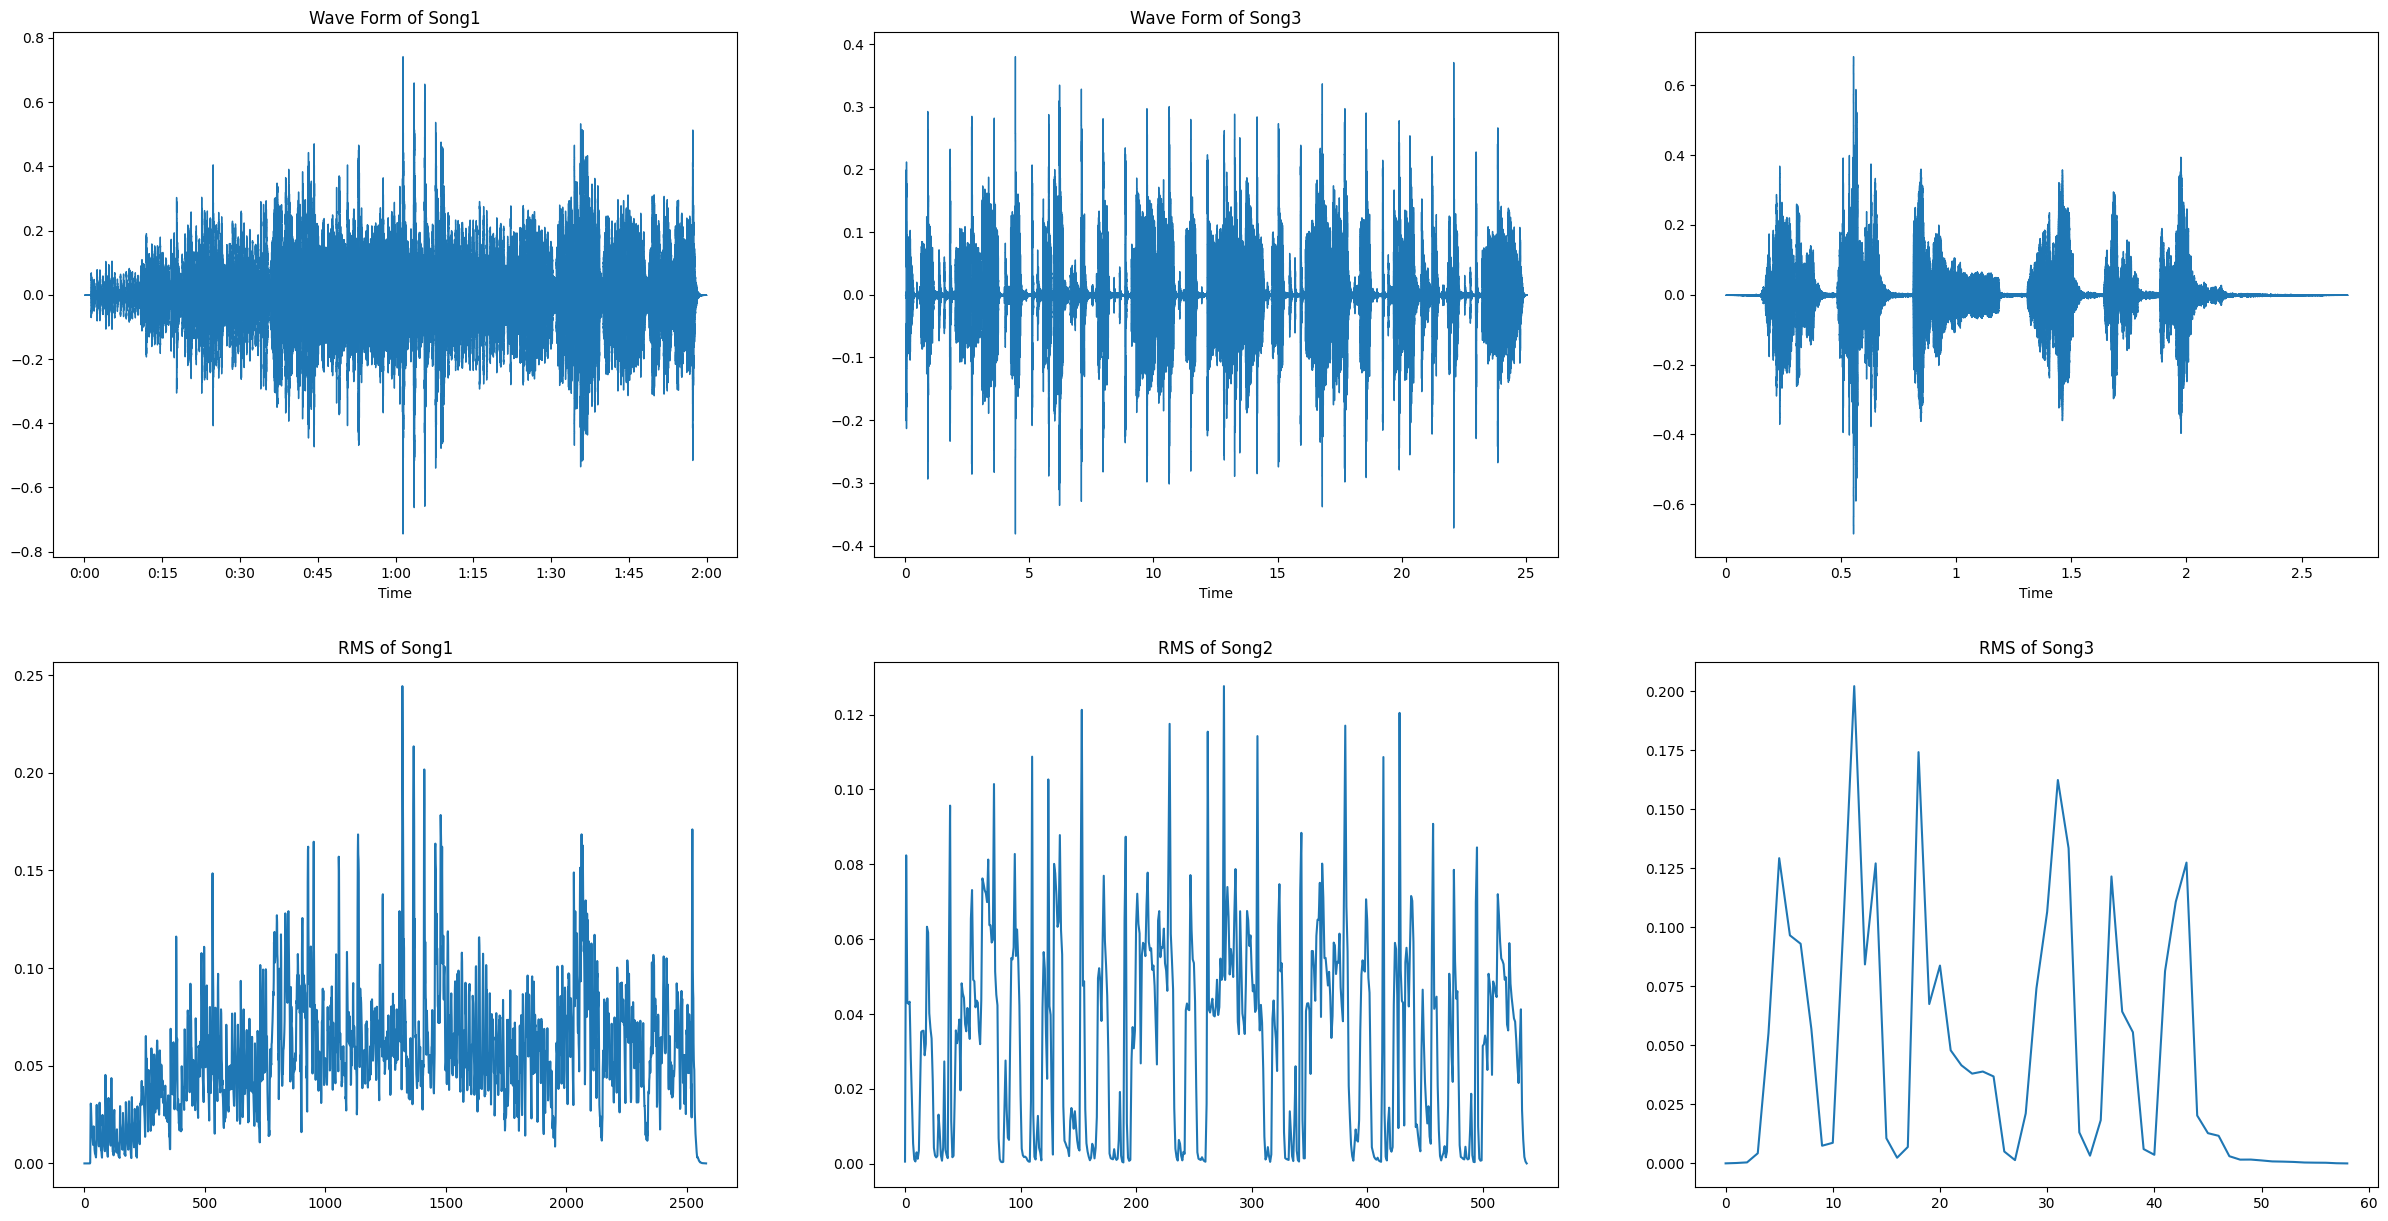

In [5]:
# Root mean square energy
RMS_sg1 = librosa.feature.rms(y=sg1, frame_length=1024, hop_length=1024)
RMS_sg2 = librosa.feature.rms(y=sg2, frame_length=1024, hop_length=1024)
RMS_sg3 = librosa.feature.rms(y=sg3, frame_length=1024, hop_length=1024)

# plotting
fig, ax = plt.subplots(2, 3, figsize=(30,15))

# plotting song1
ax[0,0].set(title='Wave Form of Song1')
ld.waveshow(sg1, sr=sr, ax=ax[0,0])
ax[1,0].set(title = 'RMS of Song1')
ax[1,0].plot(RMS_sg1.T)

# plotting song2
ax[0,1].set(title='Wave Form of Song2')
ld.waveshow(sg2, sr=sr, ax=ax[0,1])
ax[1,1].set(title = 'RMS of Song2')
ax[1,1].plot(RMS_sg2.T)

# plotting song2
ax[0,1].set(title="Wave Form of Song3")
ld.waveshow(sg3, sr=sr, ax=ax[0,2])
ax[1,2].set(title="RMS of Song3")
ax[1,2].plot(RMS_sg3.T)

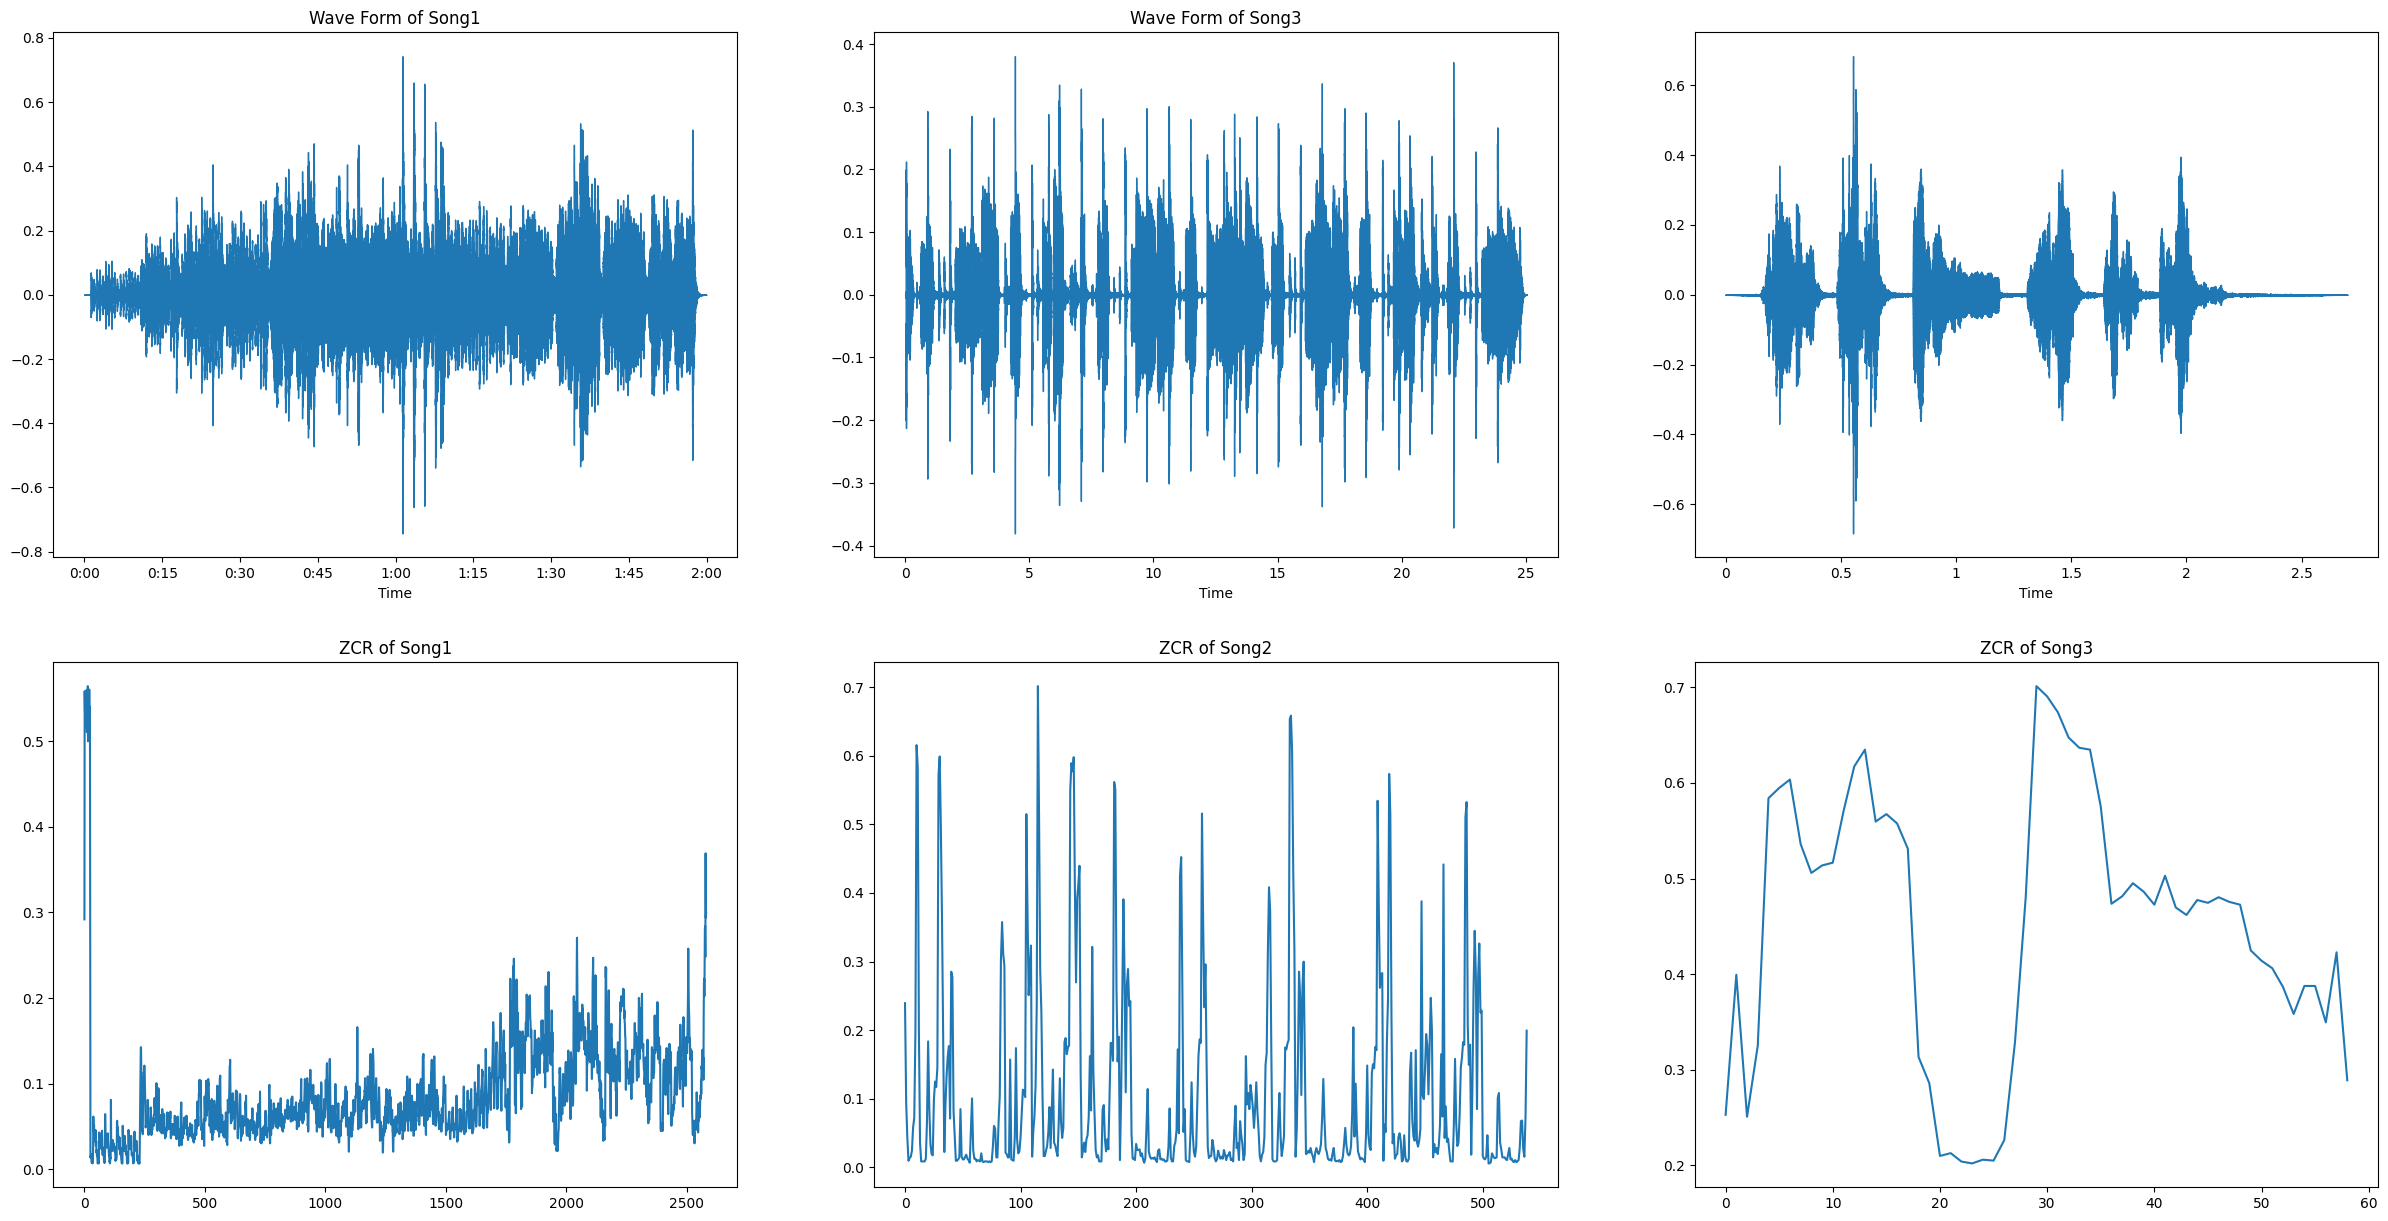

In [6]:
# ZCR for each
ZCR_sg1 = librosa.feature.zero_crossing_rate(y=sg1, frame_length=1024, hop_length=1024)
ZCR_sg2 = librosa.feature.zero_crossing_rate(y=sg2, frame_length=1024, hop_length=1024)
ZCR_sg3 = librosa.feature.zero_crossing_rate(y=sg3, frame_length=1024, hop_length=1024)

# plotting
fig, ax = plt.subplots(2, 3, figsize=(30,15))

# plotting song1
ax[0,0].set(title='Wave Form of Song1')
ld.waveshow(sg1, sr=sr, ax=ax[0,0])
ax[1,0].set(title = 'ZCR of Song1')
ax[1,0].plot(ZCR_sg1.T)

# plotting song2
ax[0,1].set(title='Wave Form of Song2')
ld.waveshow(sg2, sr=sr, ax=ax[0,1])
ax[1,1].set(title = 'ZCR of Song2')
ax[1,1].plot(ZCR_sg2.T)

# plotting song2
ax[0,1].set(title="Wave Form of Song3")
ld.waveshow(sg3, sr=sr, ax=ax[0,2])
ax[1,2].set(title="ZCR of Song3")
ax[1,2].plot(ZCR_sg3.T)

In [7]:
# Fourier Transforms
y, sr = librosa.load(librosa.example("nutcracker"), sr=44100)

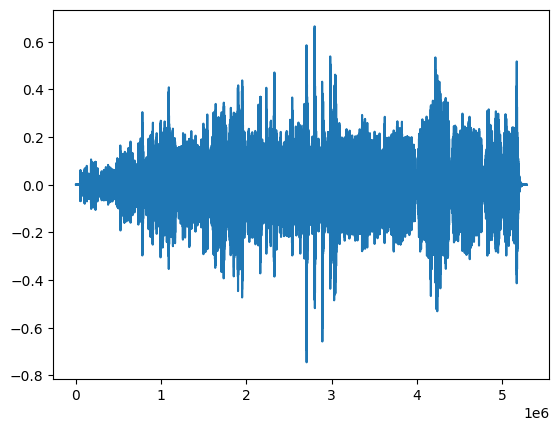

In [8]:
# plotting it
plt.plot(y)

In [9]:
# perform FFT
S = librosa.stft(y)
S_abs = np.abs(S)

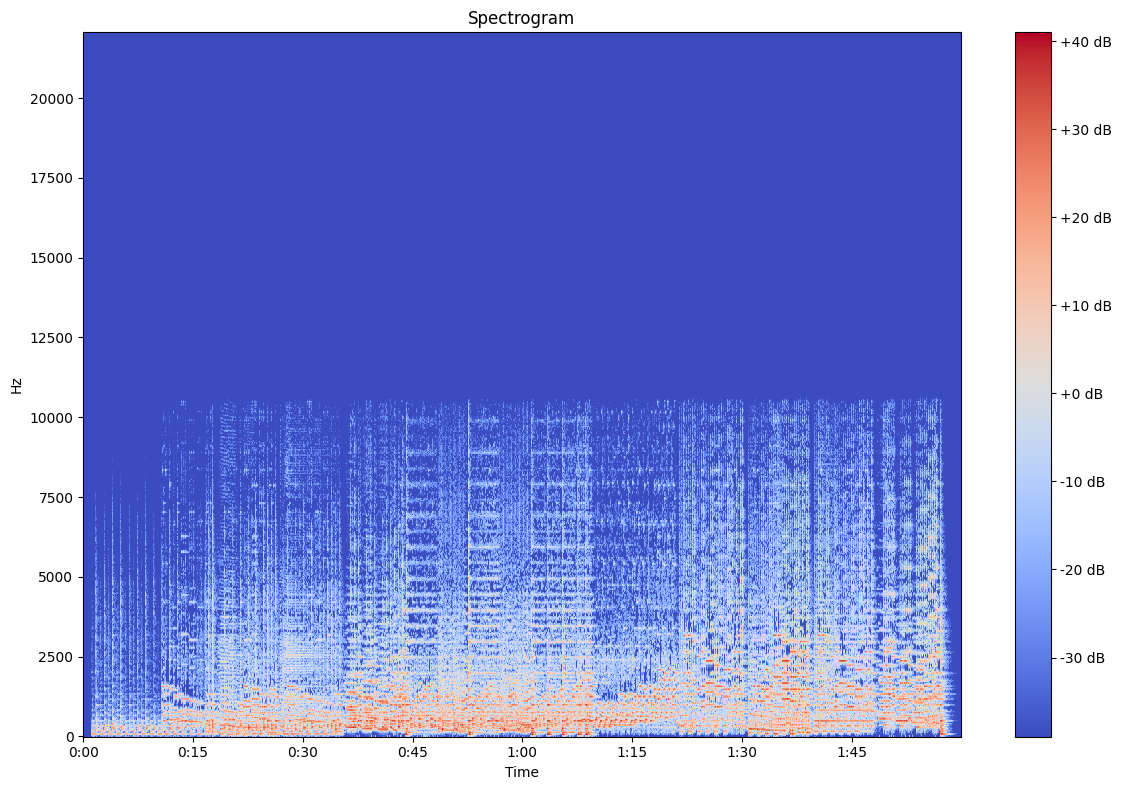

In [10]:
plt.figure(figsize=(12, 8))
librosa.display.specshow(librosa.amplitude_to_db(S_abs), sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

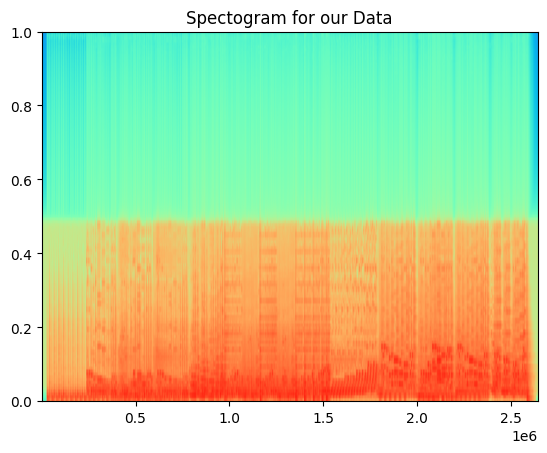

In [11]:
# plotting a spectogram for our data
plt.specgram(y, cmap="rainbow")
plt.title("Spectogram for our Data")
plt.show()

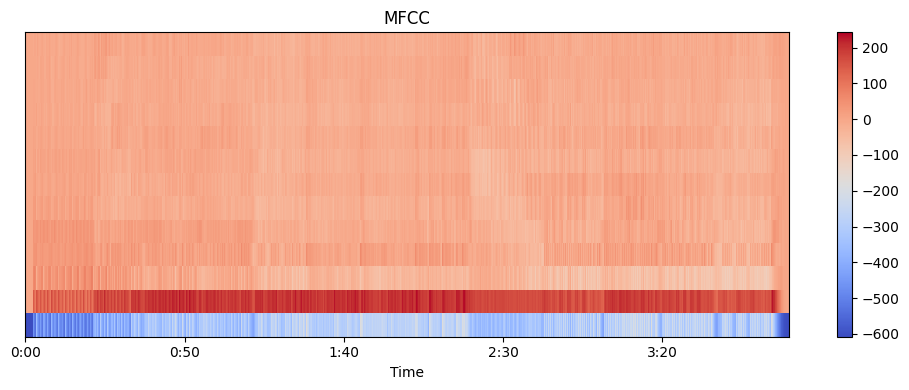

In [13]:
# Mel Frequency Cepstral Co-efficients (MFCCs)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# plotting mfcc
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()